# Importing files and modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook

In [3]:
covid19_df = pd.read_csv("covid_19_india.csv")
individuals_df = pd.read_csv('IndividualDetails.csv')
excel_file = pd.ExcelFile('Indian States Population and Area.xlsx')
indian_states_df = excel_file.parse('Sheet1')

In [4]:
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
covid19_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1313,1314,25/04/20,5:00 PM,Telengana,-,-,253,26,984
1314,1315,25/04/20,5:00 PM,Tripura,-,-,1,0,2
1315,1316,25/04/20,5:00 PM,Uttarakhand,-,-,25,0,48
1316,1317,25/04/20,5:00 PM,Uttar Pradesh,-,-,248,26,1778
1317,1318,25/04/20,5:00 PM,West Bengal,-,-,103,18,571


In [6]:
covid19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       1318 non-null   int64 
 1   Date                      1318 non-null   object
 2   Time                      1318 non-null   object
 3   State/UnionTerritory      1318 non-null   object
 4   ConfirmedIndianNational   1318 non-null   object
 5   ConfirmedForeignNational  1318 non-null   object
 6   Cured                     1318 non-null   int64 
 7   Deaths                    1318 non-null   int64 
 8   Confirmed                 1318 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 92.8+ KB


In [7]:
covid19_df.describe(include=['O'])

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
count,1318,1318,1318,1318,1318
unique,87,6,36,62,12
top,16/04/20,6:00 PM,Kerala,-,-
freq,33,600,87,872,872


In [8]:
covid19_df.describe()

,Sno,Cured,Deaths,Confirmed
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,659.500000,30.939302,6.631259,214.399848
std,380.618138,92.963392,25.189408,569.223462
min,1.000000,0.000000,0.000000,0.000000
25%,330.250000,0.000000,0.000000,3.250000
50%,659.500000,2.000000,0.000000,20.000000
75%,988.750000,18.000000,3.000000,132.000000
max,1318.000000,957.000000,301.000000,6817.000000


# Total confirmed cases, deaths, and cured

In [9]:
# d = {
#     'total_confirmed': [covid19_df.Confirmed.sum()],
#     'total_cured':[covid19_df.Cured.sum()],
#     'total_deaths':[covid19_df.Deaths.sum()]
# }
# print(d)
# pd.DataFrame(data = d)
pd.DataFrame([covid19_df.Confirmed.sum(), covid19_df.Cured.sum(), covid19_df.Deaths.sum()], 
             index = ['total_confirmed','total_cured','total_deaths'],
            columns = [f"{covid19_df.Date.iloc[0]} - {covid19_df.Date.iloc[-1]}"])


,30/01/20 - 25/04/20
total_confirmed,282579
total_cured,40778
total_deaths,8740


# Rise in cases

In [10]:
covid19_df_Delhi = covid19_df[covid19_df['State/UnionTerritory'] == 'Delhi']
covid19_df_Delhi.head()
covid19_df_Delhi.tail()

covid19_df_Gujarat = covid19_df[covid19_df['State/UnionTerritory'] == 'Gujarat']
covid19_df_Gujarat.head()
# covid19_df_Gujarat.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
231,232,20/03/20,6:00 PM,Gujarat,5,0,0,0,5
251,252,21/03/20,6:00 PM,Gujarat,7,0,0,0,7
274,275,22/03/20,6:00 PM,Gujarat,18,0,0,1,18
297,298,23/03/20,6:00 PM,Gujarat,29,0,0,1,29
320,321,24/03/20,6:00 PM,Gujarat,32,1,0,1,33


<IPython.core.display.Javascript object>


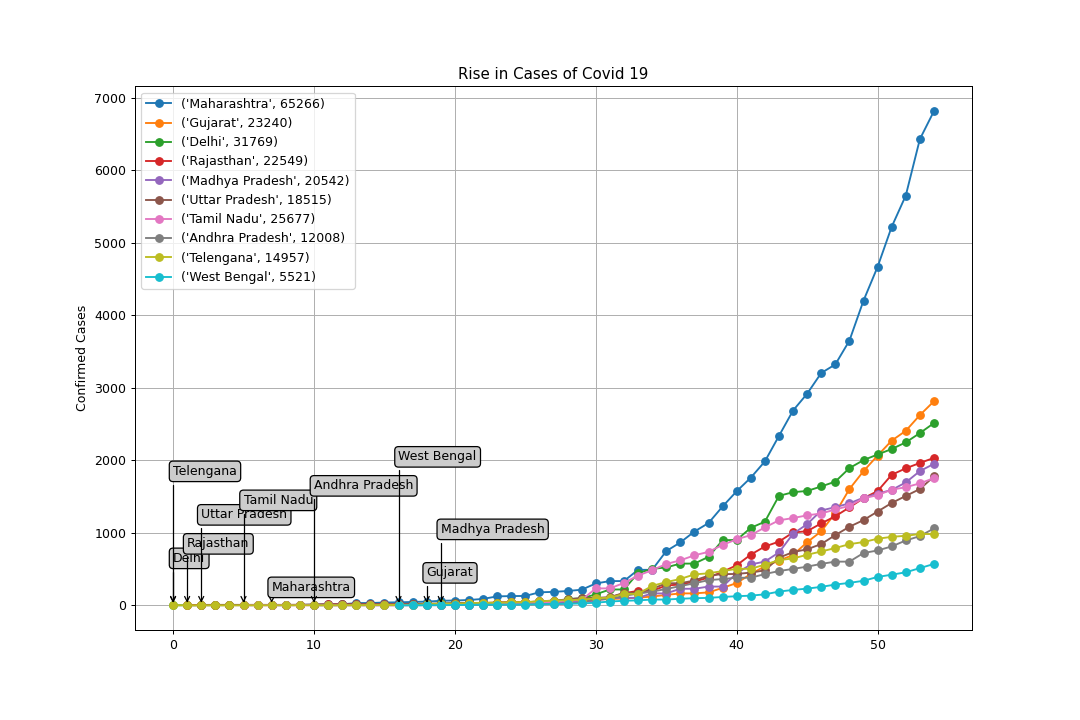

In [11]:
# print(covid19_df_confirmed.Confirmed[covid19_df_confirmed['State/UnionTerritory'] == 'Delhi'].shape, np.arange(0, 55, 1).shape)
covid19_df_confirmed = covid19_df.sort_values(by = ['Confirmed'], ascending=False)
state_UT = covid19_df_confirmed['State/UnionTerritory'].unique()[:10]
covid19_df_confirmed = covid19_df.sort_values(by = ['Confirmed'])
plt.figure(figsize=(12, 8))
bbox = dict(boxstyle ="round", fc ="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90, rad = 10")
c=0
for i in state_UT:
    c+=1
    d = covid19_df_confirmed.Confirmed[covid19_df_confirmed['State/UnionTerritory'] == i].sum()
    s = list(covid19_df_confirmed.Confirmed[covid19_df_confirmed['State/UnionTerritory'] == i].shape)
    
    plt.plot(np.arange(55 - s[0], 55, 1), covid19_df_confirmed.Confirmed[covid19_df_confirmed['State/UnionTerritory'] == i],
             '-o', label=(i, d))
    plt.annotate(i, xy =(55 - s[0], 0), xytext =(55-s[0], 200*c), bbox = bbox, arrowprops = arrowprops)

plt.ylabel('Confirmed Cases')
plt.title('Rise in Cases of Covid 19')
plt.legend()
plt.grid();

# Rise in Deaths

<IPython.core.display.Javascript object>


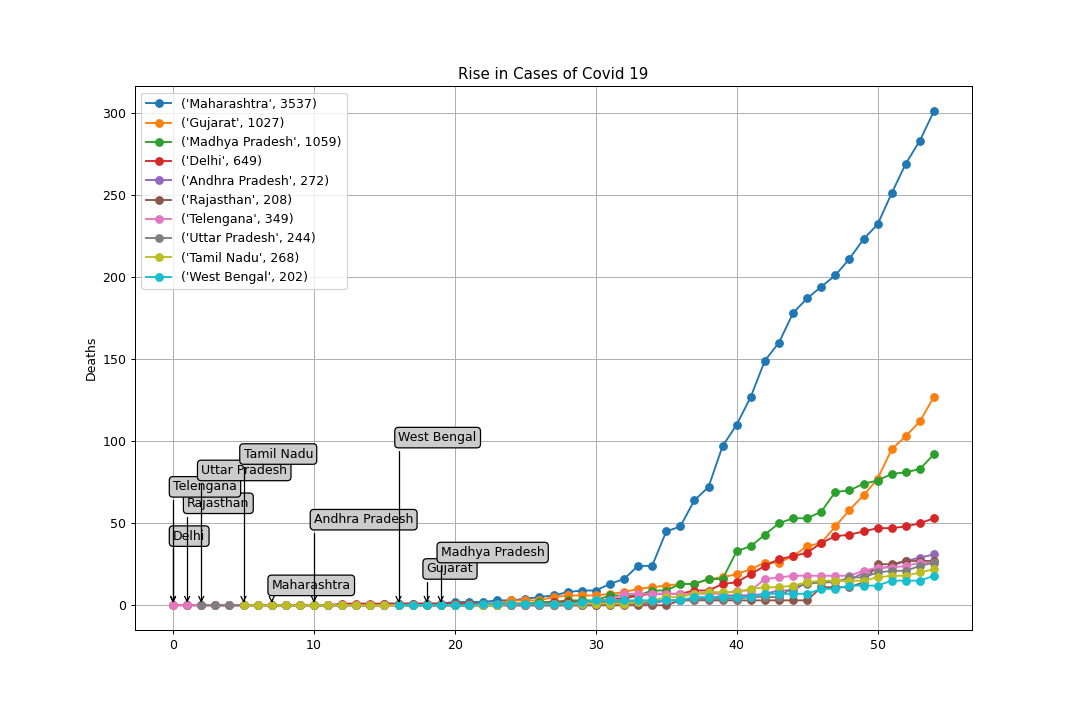

In [12]:
covid19_df_confirmed = covid19_df.sort_values(by = ['Deaths'], ascending=False)
state_UT = covid19_df_confirmed['State/UnionTerritory'].unique()[:10]
plt.figure(figsize=(12, 8))
c= 0
bbox = dict(boxstyle ="round", fc ="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90, rad = 10")
  
for i in state_UT:
    c+=1
    d = covid19_df_confirmed.Deaths[covid19_df_confirmed['State/UnionTerritory'] == i].sum()
    s = list(covid19_df_confirmed.Deaths[covid19_df_confirmed['State/UnionTerritory'] == i].shape)
    plt.plot(np.arange(55 - s[0], 55, 1), covid19_df_confirmed.Deaths[covid19_df_confirmed['State/UnionTerritory'] == i][::-1],
             '-o' , label=(i, d))
    plt.annotate(i, xy =(55 - s[0], 0), xytext =(55-s[0], 10*c),bbox = bbox, arrowprops = arrowprops)
plt.ylabel('Deaths')
plt.title('Rise in Cases of Covid 19')
plt.legend()
plt.grid();

In [13]:
indian_states_df.head()

,State,Aadhaar assigned as of 2019,Area (per sq km)
0,Delhi,21763471,1483
1,Haryana,28941133,44212
2,Kerala,36475649,38852
3,Himachal Pradesh,7560770,55673
4,Punjab,30355185,50362


In [14]:
indian_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State                        37 non-null     object
 1   Aadhaar assigned as of 2019  37 non-null     int64 
 2   Area (per sq km)             37 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1016.0+ bytes


In [15]:
indian_states_df = indian_states_df[['State', 'Aadhaar assigned as of 2019']]
indian_states_df.columns = ['State/UnionTerritory',"Population"]
indian_states_df.head()

,State/UnionTerritory,Population
0,Delhi,21763471
1,Haryana,28941133
2,Kerala,36475649
3,Himachal Pradesh,7560770
4,Punjab,30355185


# Merging Covid_19_india, and Indian_states_population

In [16]:
covid19_df = pd.merge(covid19_df, indian_states_df, on = ['State/UnionTerritory'])
covid19_df['Cases/10million'] = (covid19_df['Confirmed']/covid19_df['Population'])*1e7
covid19_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Population,Cases/10million
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,36475649,0.274156
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,36475649,0.274156
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,36475649,0.548311
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,36475649,0.822467
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,36475649,0.822467


# Droping non essential columns from covid 19 df

In [17]:
covid19_df = covid19_df.drop(['Sno', 'Time', 'ConfirmedIndianNational','ConfirmedForeignNational'], axis = 1)
covid19_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Population,Cases/10million
0,30/01/20,Kerala,0,0,1,36475649,0.274156
1,31/01/20,Kerala,0,0,1,36475649,0.274156
2,01/02/20,Kerala,0,0,2,36475649,0.548311
3,02/02/20,Kerala,0,0,3,36475649,0.822467
4,03/02/20,Kerala,0,0,3,36475649,0.822467


In [18]:
covid19_df.fillna(0, inplace=True)
covid19_df.sort_values(by='Cases/10million', ascending=False)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Population,Cases/10million
196,25/04/20,Delhi,857,53,2514,21763471,1155.146622
195,24/04/20,Delhi,808,50,2376,21763471,1091.737619
194,23/04/20,Delhi,724,48,2248,21763471,1032.923471
193,22/04/20,Delhi,611,47,2156,21763471,990.650802
192,21/04/20,Delhi,431,47,2081,21763471,956.189387
...,...,...,...,...,...,...,...
407,07/03/20,Tamil Nadu,0,0,1,72344821,0.138227
768,18/03/20,West Bengal,0,0,1,91928327,0.108780
769,19/03/20,West Bengal,0,0,1,91928327,0.108780
1216,20/04/20,Nagaland,0,0,0,1262729,0.000000


<IPython.core.display.Javascript object>


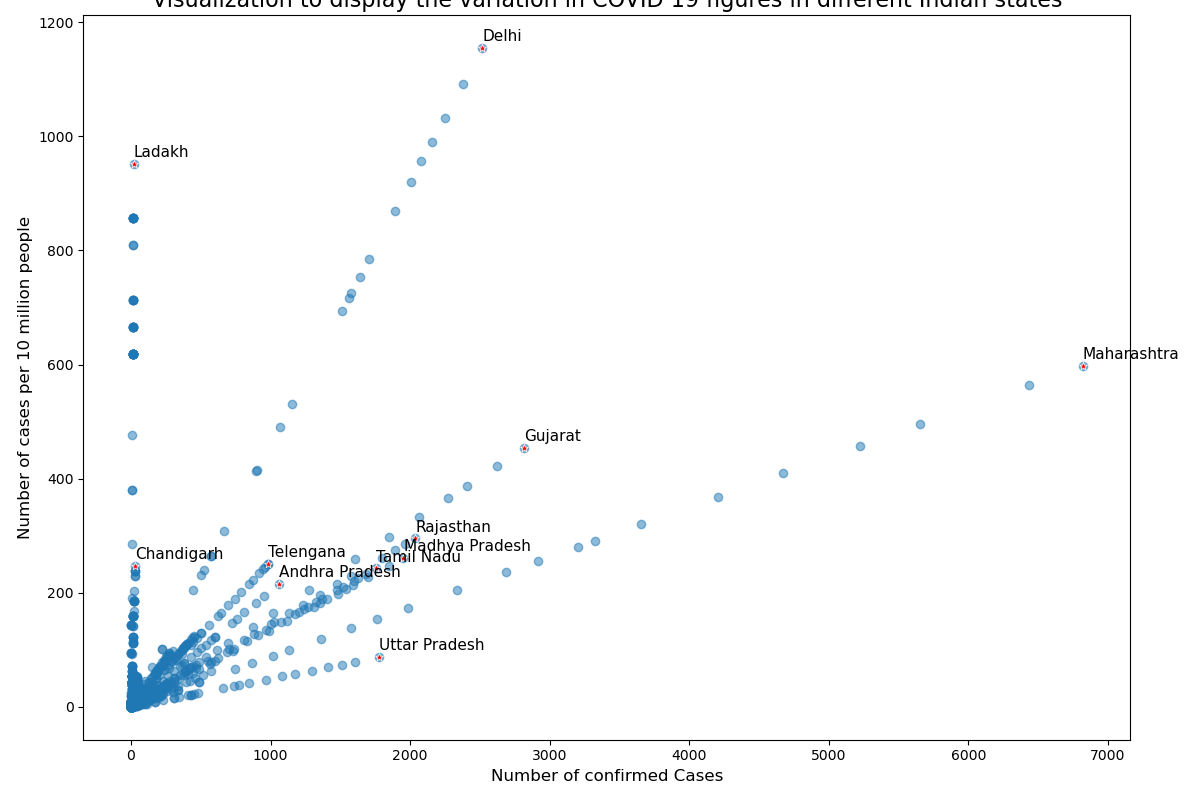

C:\Users\WarMachine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [19]:
df = covid19_df[(covid19_df["Confirmed"] >= 1000) | (covid19_df['Cases/10million']>=200)]
df = df[df.Date == '25/04/20']
plt.figure(figsize=(12,8), dpi=80)
plt.scatter(covid19_df['Confirmed'], covid19_df['Cases/10million'], alpha=0.5)
plt.xlabel('Number of confirmed Cases', size=12)
plt.ylabel('Number of cases per 10 million people', size=12)
sns.scatterplot(df['Confirmed'], df['Cases/10million'],marker ='*', color="red");

for i in range(len(df)):
    plt.annotate(df['State/UnionTerritory'].tolist()[i], xy=
                (df['Confirmed'].tolist()[i], df['Cases/10million'].tolist()[i]),
                xytext = (df["Confirmed"].tolist()[i] + 1.0, df["Cases/10million"].tolist()[i] + 12.0),
                         size=11)
plt.tight_layout()
plt.title("Visualization to display the variation in COVID 19 figures in different Indian states", size=16)
plt.show()

<IPython.core.display.Javascript object>


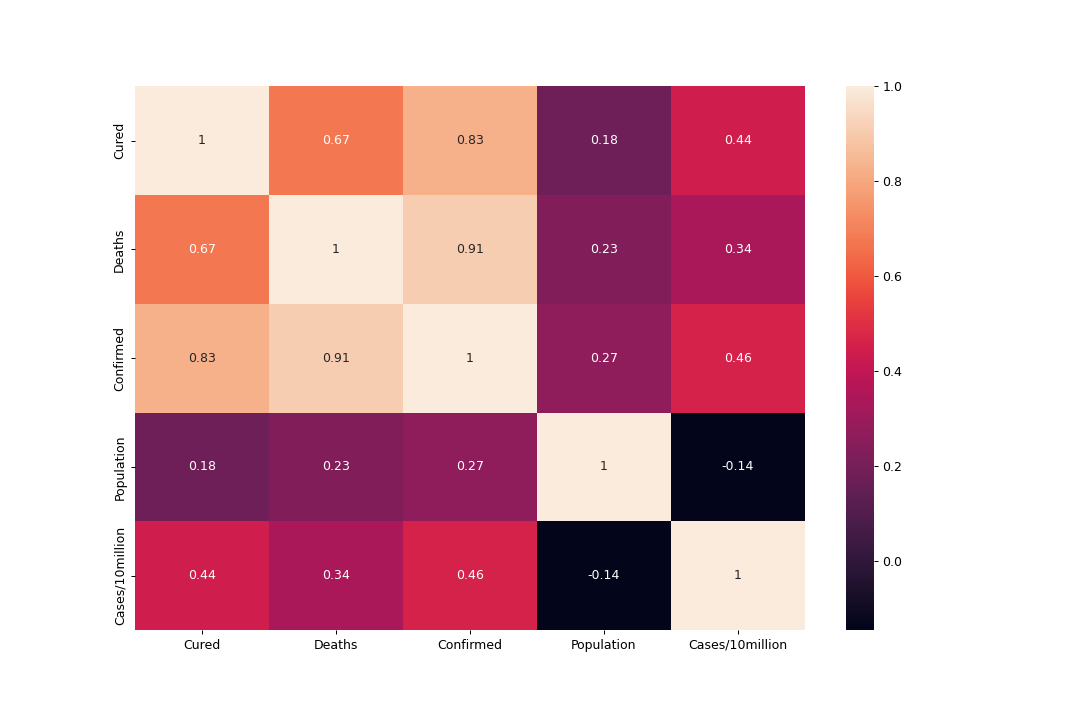

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(covid19_df.corr(), annot=True);

In [23]:
individuals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18032 entries, 0 to 18031
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  18032 non-null  int64 
 1   government_id       2518 non-null   object
 2   diagnosed_date      18032 non-null  object
 3   age                 1700 non-null   object
 4   gender              3884 non-null   object
 5   detected_city       2163 non-null   object
 6   detected_district   14674 non-null  object
 7   detected_state      18032 non-null  object
 8   nationality         1608 non-null   object
 9   status_change_date  17922 non-null  object
 10  notes               16714 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.5+ MB


In [25]:
individuals_df.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [26]:
individuals_df.isna().sum()

id                        0
government_id         15514
diagnosed_date            0
age                   16332
gender                14148
detected_city         15869
detected_district      3358
detected_state            0
nationality           16424
status_change_date      110
notes                  1318
dtype: int64